In [89]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

In [3]:
human_ch1 = '../data/Homo_sapiens.GRCh38.dna_sm.chromosome.Y.fa'
motifs_input = '../data/human_motifs.fa'

In [11]:
Seq0=[]
for seq_record in SeqIO.parse(motifs_input, "fasta"):
    
    Seq0(repr(seq_record.seq))
    

Seq('G0.0085110.0042550.9872340.000000A0.9021270.0127660.03...234')
Seq('R0.1735160.1050230.7214610.000000T0.0000000.0000000.00...817')
Seq('C0.0000001.0000000.0000000.000000C0.0000001.0000000.00...000')
Seq('V0.4182690.1682690.4134620.000000T0.0000000.0000000.00...500')
Seq('G0.0000000.0000001.0000000.000000G0.0000000.0000001.00...000')
Seq('Y0.1204820.4779120.0481930.353414K0.0722890.1204820.20...382')
Seq('G0.1401270.1146500.7452230.000000T0.0000000.0000000.00...866')
Seq('R0.5748790.0531400.3671500.004831T0.0096620.0000000.00...662')
Seq('R0.1709090.0800000.7490910.000000T0.0000000.1200000.00...091')
Seq('Y0.0370370.1925930.0666670.703703M0.3037040.6074070.06...000')
Seq('K0.1144070.1313560.1949150.559322C0.0635590.6355930.15...983')
Seq('D0.2459680.1250000.3024190.326613N0.2620970.1854840.32...194')
Seq('R0.5094340.1358490.3547170.000000T0.0000000.0000000.00...566')
Seq('T0.0000000.0000000.0000001.000000C0.1395350.8023250.05...000')
Seq('A1.0000000.0000000.0000000.000000A1.0000000

In [13]:
with open(motifs_input) as fasta_file:  # Will close handle cleanly
    identifiers = []
    sequences = []
    lengths = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        sequences.append(seq_record.seq)
        lengths.append(len(seq_record.seq))

In [86]:
motifs = []
for i in range(0,len(sequences)):
    seq = re.findall('[A-Z]',str(sequences[i]))
    motifs.append(''.join(seq))
motifs

['GARWTGTAGT',
 'RTCACGTGAC',
 'CCWWATWWGG',
 'VTGACGTCAY',
 'GGGARWTGTA',
 'YKYYSATTGGYYRVN',
 'GTCACGTGAC',
 'RTGASTCAGC',
 'RTCACGTGAC',
 'YMTCGCGAGA',
 'KCYSATTGGY',
 'DNHWMBRSYRCCMYCTASTGGH',
 'RTTGYRCAAY',
 'TCTCGCGAGA',
 'AACTACAAYTCCCR',
 'RTGASTCAYH',
 'YWSTGCGCMTGCGCV',
 'KTCAGCACCDYGGAS',
 'GCCGCCATBTTKDNNNNSGSVRV',
 'DRCCASYAGRKGGCRSYVKW',
 'SACTTCCGSY',
 'TGMTGASTCA',
 'KYYBATTGGYY',
 'YRRCCAATVR',
 'TGTCCRTGGT',
 'TMTCGCGAKA',
 'RSCGGAAGYG',
 'NHRRCCAATVRRMRNSVRVVDN',
 'KGGRAWTYCC',
 'SCMYRGCAAC',
 'RCCASCAGRKGGCRS',
 'BYTTATCWSNNNNNNVCAS',
 'TMTCGCGAGA',
 'ACTTCCYCWT',
 'CYSATTGGYY',
 'BCTTATCWSB',
 'RCTTCCGSKW',
 'ATWTGCAT',
 'KNDVTGASTCA',
 'AAACTACATTTCCCA',
 'BGMCCCGGAA',
 'TGRMCTTTGNHCY',
 'KCACGTGMSN',
 'YTTCCHGGAA',
 'TYTCASTTCC',
 'SCGCCATBTTKRDTVMKGGCRRVDV',
 'YBGTYKCCMTRGCAAC',
 'VTGASTCABN',
 'GGACAGCKCC',
 'ACCAGGKGGCR',
 'ATTGGYYNNNNBNSMYGYCMVTCW',
 'TCYCHDGRGA',
 'VTGANTCAYN',
 'MACTTTCHCT',
 'GGGARWTGTA',
 'STGASTCAYC',
 'ACTAGAKGR',
 'WTYTGCATRWSAAWR',
 '

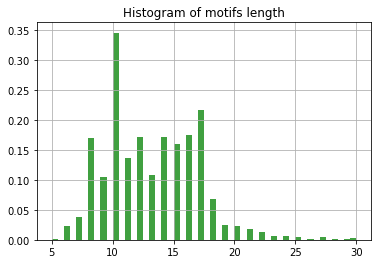

In [97]:
# the histogram of motifs length
x = [len(motifs[i]) for i in range(0,len(motifs))]
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of motifs length')
plt.grid(True)
plt.show()

In [144]:
nucl_counts = dict()
for i in range(0,len(motifs)):
  for i in motifs[i]:
    nucl_counts[i] = nucl_counts.get(i, 0) + 1
nucl_counts

{'G': 3021,
 'A': 4766,
 'R': 1738,
 'W': 1431,
 'T': 3646,
 'C': 2988,
 'V': 951,
 'Y': 1428,
 'K': 712,
 'S': 1133,
 'N': 1393,
 'M': 778,
 'D': 989,
 'H': 1070,
 'B': 804}

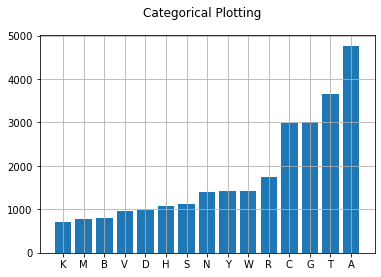

In [155]:
nucl_counts_sorted = {k: v for k, v in sorted(nucl_counts.items(), key=lambda item: item[1])}

names = list(nucl_counts_sorted.keys())
values = list(nucl_counts_sorted.values())

plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.grid()
plt.show()

In [161]:
#dire si une séquence est ou non motif

def est_motif(liste_motifs,seq,seuil):
    n,m = len(liste_motifs),len(seq)
    for i in range(n):
        cur_dist = 0
        if len(liste_motifs[i]) == m:
            for j in range(m):
                if liste_motifs[i][j] == 'A' and seq[j] != 'A':
                    cur_dist +=1
                    #print("incrémente 1")
                elif liste_motifs[i][j] == 'T' and seq[j] != 'T':
                    cur_dist +=1
                    #print("incrémente 2")
                elif liste_motifs[i][j] == 'G' and seq[j] != 'G':
                    cur_dist +=1
                    #print("incrémente 3")
                elif liste_motifs[i][j] == 'C' and seq[j] != 'C':
                    cur_dist +=1
                    #print("incrémente 4")
                elif liste_motifs[i][j] == 'U' and seq[j] != 'U':
                    cur_dist +=1
                    #print("incrémente 5")
                elif liste_motifs[i][j] == 'R' and seq[j] != 'R' and seq[j] != 'A' and seq[j] != 'G':
                    cur_dist +=1
                    #print("incrémente 6")
                elif liste_motifs[i][j] == 'Y' and seq[j] != 'Y' and seq[j] != 'C' and seq[j] != 'T' and seq[j] != 'U':
                    cur_dist +=1
                    #print("incrémente 7")
                elif liste_motifs[i][j] == 'K' and seq[j] != 'K' and seq[j] != 'G' and seq[j] != 'T' and seq[j] != 'U':
                    cur_dist +=1
                    #print("incrémente 8")
                elif liste_motifs[i][j] == 'M' and seq[j] != 'M' and seq[j] != 'A' and seq[j] != 'C':
                    cur_dist +=1
                    #print("incrémente 9")
                elif liste_motifs[i][j] == 'S' and seq[j] != 'S' and seq[j] != 'C' and seq[j] != 'G':
                    cur_dist +=1
                    #print("incrémente 10")
                elif liste_motifs[i][j] == 'W' and seq[j] != 'W' and seq[j] != 'A' and seq[j] != 'T' and seq[j] != 'U':
                    cur_dist +=1
                    #print("incrémente 11")
                elif liste_motifs[i][j] == 'B' and seq[j] == 'A':
                    cur_dist +=1
                    #print("incrémente 12")
                elif liste_motifs[i][j] == 'D' and seq[j] == 'C':
                    cur_dist +=1
                    #print("incrémente 13")
                elif liste_motifs[i][j] == 'H' and seq[j] == 'G':
                    cur_dist +=1
                    #print("incrémente 14")
                elif liste_motifs[i][j] == 'V' and seq[j] != 'V' and seq[j] != 'A' and seq[j] != 'C' and seq[j] != 'G':
                    cur_dist +=1
                    #print("incrémente 15")
            #print(cur_dist)
            if cur_dist <= seuil:
                return True
    return False

In [162]:
ADN = 'GARWTGTAGT'

In [163]:
est_motif(motifs, ADN, 0)

True